### Red Wine Quality Analysis

**Introduction**

In the quest for excellence, the wine industry heavily emphasizes maintaining consistent quality to satisfy consumers and uphold brand reputation. This project focuses on analyzing the Red Wine Quality dataset through robust data analysis and machine learning techniques to discern the key factors that influence wine quality. We aim to uncover the intricate patterns among the physicochemical properties of the wine and explore their impact on the sensory quality score.

**Data Description**

The dataset for this analysis comprises physicochemical (input) and sensory (output) variables of red wine. These input variables, representing measurements from various stages of wine production, include:

* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Alcohol

The output variable is the wine's quality, scored on a scale from 0 to 10. Details regarding the dataset's source will be acknowledged if available, and specifics such as the number of samples and features will be noted.

**Data Loading and Preprocessing**

We will utilize Pandas for data loading. The preprocessing steps will aim to optimize data quality and readiness for further analysis. Key actions will include:

* **Handling missing values:** Depending on the data attributes, we will apply mean/median imputation or outright removal of missing data.
* **Scaling numerical features:** To equalize the influence of each feature in our analyses, we'll employ scaling techniques such as standardization or normalization based on the distribution of the data.

**Exploratory Data Analysis (EDA)**

Our EDA will aim to thoroughly understand the data properties and unearth relationships between variables through:

* **Univariate analysis:** Utilizing histograms and boxplots to examine distributions and pinpoint outliers.
* **Multivariate analysis:** Employing heatmaps to explore the correlation matrix, highlighting relationships and potential multicollinearity among features.

**Statistical Inference**

Defining our target population (e.g., varieties of red wine), we will develop specific statistical hypotheses based on EDA insights concerning relationships between features and the wine quality:

* Testing correlations between alcohol content and wine quality, as well as volatile acidity and wine quality.
* Establishing confidence intervals for crucial statistics and setting significance levels.
* Implementing suitable statistical tests, such as the Pearson correlation coefficient, to test these hypotheses.

**Machine Learning Models**

Focusing on linear regression models, we will predict the quality and alcohol content of the wine using the remaining features. Our approach will start with an Ordinary Least Squares regression, evaluating model performance through:

* **Feature significance:** Analyzing p-values of coefficients to identify influential features.
* **R-squared and Adjusted R-squared:** These metrics will reflect how well the model captures the variance in the target variable.
* **Information criteria:** Using AIC and BIC to compare models and select the optimal balance of simplicity and fit.

**Visualization**

To effectively communicate our findings, we will create a dashboard using tools like Looker Studio, incorporating various chart types such as:

* Bar charts for feature distributions
* Scatter plots for correlations
* Line charts for tracking model performance

**Conclusion and Suggestions for Improvement**

The final section will synthesize the analysis results, underscoring critical insights into how physicochemical properties influence wine quality and suggesting avenues for enhancing the analytical approach.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sqlite3

import pandas as pd
from IPython.display import Image

from red_wine_quality_utils import (
    get_columns,
    identify_outliers,
    log_transform_features,
    plot_box_chart,
    plot_correlation,
    plot_heatmap,
    plot_histograms,
    plot_model_predictions,
    remove_duplicates,
    test_correlation,
    train_linear_model,
)

In [3]:
wine_df = pd.read_csv("data/winequality_red.csv")
conn = sqlite3.connect("data/wine_quality.db")
wine_df.to_sql("wine_quality", conn, if_exists="replace", index=False)

1599

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Great news, the data we are looking at does not have any missing entries.  There are 1,599 rows of data with 12 columns each. Everything is stored as numeric variables.  

Next up, we see if there are any duplicate entries in the data, if there are - get rid of them.


In [6]:
wine_df = remove_duplicates(wine_df)

Removed 240 duplicate rows


We can see that, there were 240 duplicates in the dataset, which have been removed, we can see that by the output of our function.

Now, we describe the data to get a better understanding of the distribution of the features.

In [7]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


Those 12 columns represent the following features:



* **Fixed Acidity:** The average value is 8.31, the highest value is 15.9.
* **Volatile Acidity:** The average value is 0.529, the highest value is 1.58.
* **Citric Acid:** The average value is 0.272, the highest value is 1.00.
* **Residual Sugar:** The average value is 2.523, the highest value is 15.5.
* **Chlorides:** The average value is 0.088, the highest value is 0.611.
* **Free Sulfur Dioxide:** The average value is 15.89, the highest value is 72.00.
* **Total Sulfur Dioxide:** The average value is 46.82, the highest value is 289.00.
* **Density:** The average value is 0.996, the highest value is 1.004.
* **pH:** The average value is 3.3, the highest value is 4.01.
* **Sulphates:** The average value is 0.65, the highest value is 2.00.
* **Alcohol:** The average value is 10.43, the highest value is 14.90.
* **Quality:** The average value is 5.62, the highest value is 8.00.

Afterwards, we can rename the features to be able to use them more easily.


In [8]:
get_columns(wine_df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
wine_df.rename(
    columns={
        "fixed acidity": "fixed_acidity",
        "volatile acidity": "volatile_acidity",
        "citric acid": "citric_acid",
        "residual sugar": "residual_sugar",
        "free sulfur dioxide": "free_sulfur_dioxide",
        "total sulfur dioxide": "total_sulfur_dioxide",
    },
    inplace=True,
)

After fixing the columns names, we can check for the outliers in the features itself.

In [10]:
plot_box_chart(
    wine_df,
    "Feature",
    "Value",
    "Boxplot of Features",
    save_path="images/boxplot_features.png",
)

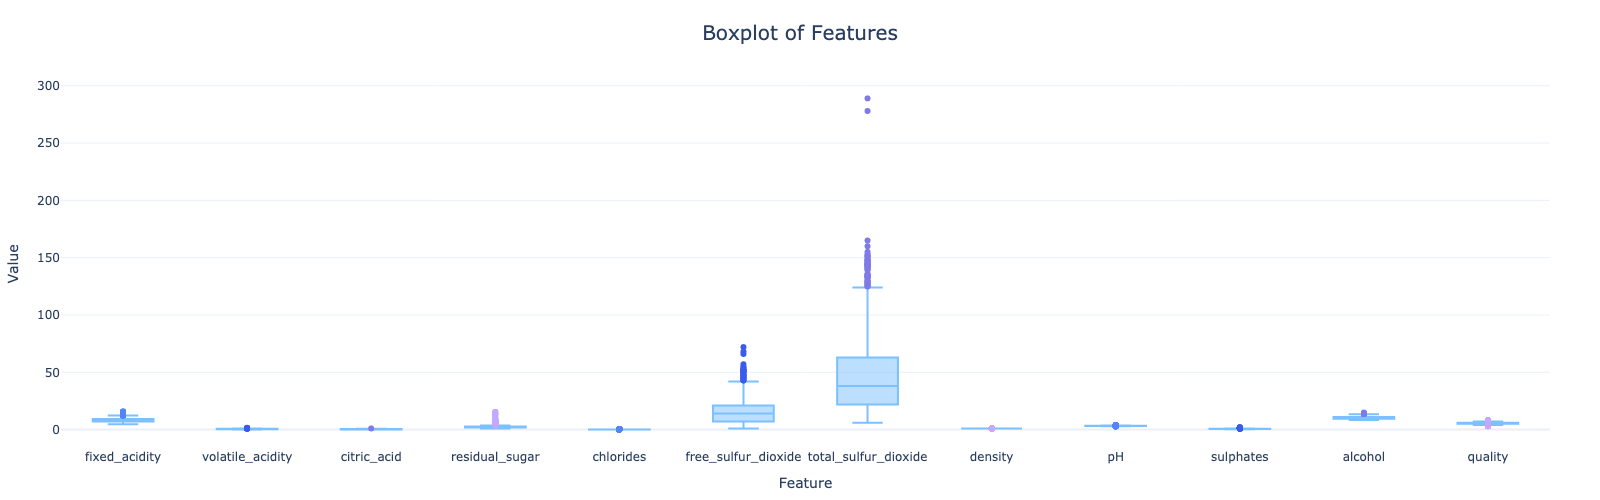

In [11]:
Image(filename="images/boxplot_features.png")

The boxplot reveals noticeable outliers in features like "free sulfur dioxide" and "total sulfur dioxide." While other features may also have outliers, the IQR (Interquartile Range) can help us further confirm these existing outliers and identify potential ones in other features.

In [12]:
outlier_info = identify_outliers(wine_df)
print(outlier_info["outliers_per_column"])
print(
    f"Total number of outliers across all columns: {outlier_info['total_outliers']}"
)

fixed_acidity            41
volatile_acidity         19
citric_acid               1
residual_sugar          126
chlorides                87
free_sulfur_dioxide      26
total_sulfur_dioxide     45
density                  35
pH                       28
sulphates                55
alcohol                  12
quality                  27
dtype: int64
Total number of outliers across all columns: 502


In our dataset, we have identified a total of 601 outliers across 12 features using the Interquartile Range (IQR) method. 

These outliers represent values that significantly deviate from the rest of the data. 

While outliers can sometimes indicate errors, they can also represent valid but extreme variations in the data. 

At this stage, without a deeper understanding of the context and nature of the data, we have chosen to temporarily retain these outliers in our analysis. 

This decision stems from the possibility that these outliers could provide valuable insights. 

However, we acknowledge that outliers can potentially skew our analysis and we will therefore revisit this decision as necessary during later stages of our analysis.

In [13]:
plot_histograms(
    wine_df,
    ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar"],
    save_path="images/histograms.png",
)

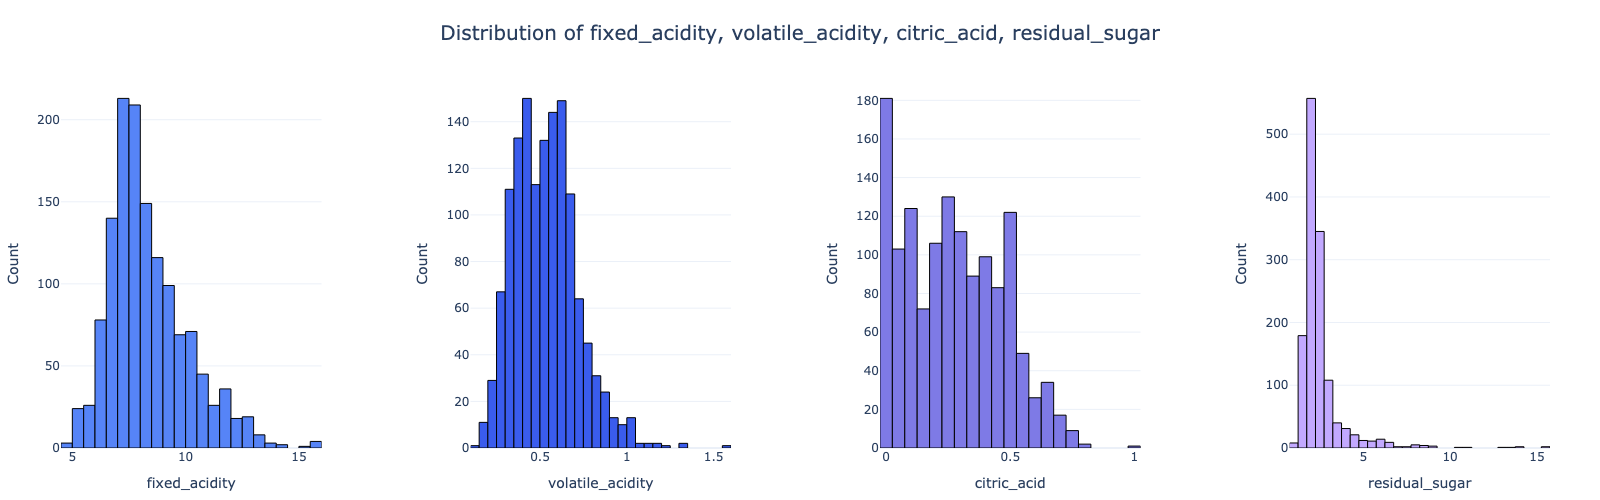

In [14]:
Image(filename="images/histograms.png")

**Fixed Acidity:** The distribution is right-skewed, indicating that most wines have a fixed acidity level around 7-8, with fewer wines having higher fixed acidity.

**Volatile Acidity:** The data is also right-skewed, showing that most wines have a volatile acidity around 0.5, with only a few wines having a volatile acidity above 1.

**Citric Acid:** This feature shows a bimodal distribution, indicating two groups of wines, one with low citric acid close to 0 and another with citric acid between 0.25 and 0.5.

**Residual Sugar:** The distribution is highly right-skewed, suggesting that most wines have low residual sugar levels, with a peak below five. Few wines have high residual sugar levels.

In [15]:
plot_histograms(
    wine_df,
    ["chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density"],
    save_path="images/histograms1.png",
)

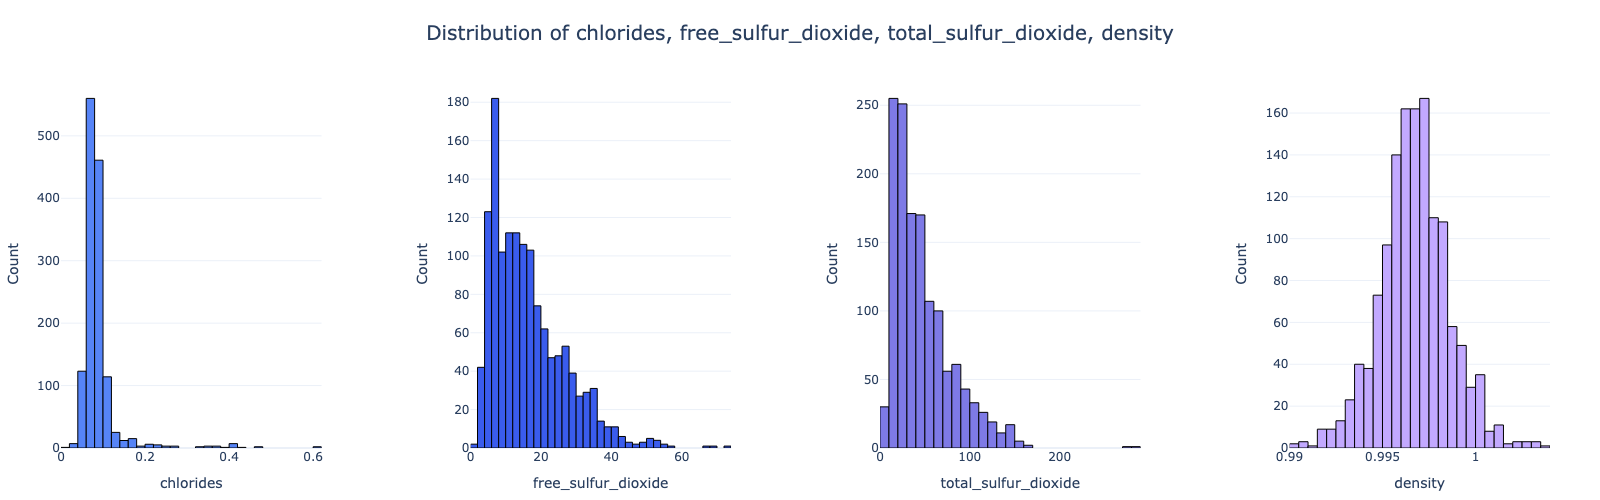

In [16]:
Image(filename="images/histograms1.png")

In [17]:
plot_histograms(
    wine_df,
    ["pH", "sulphates", "alcohol", "quality"],
    save_path="images/histograms2.png",
)

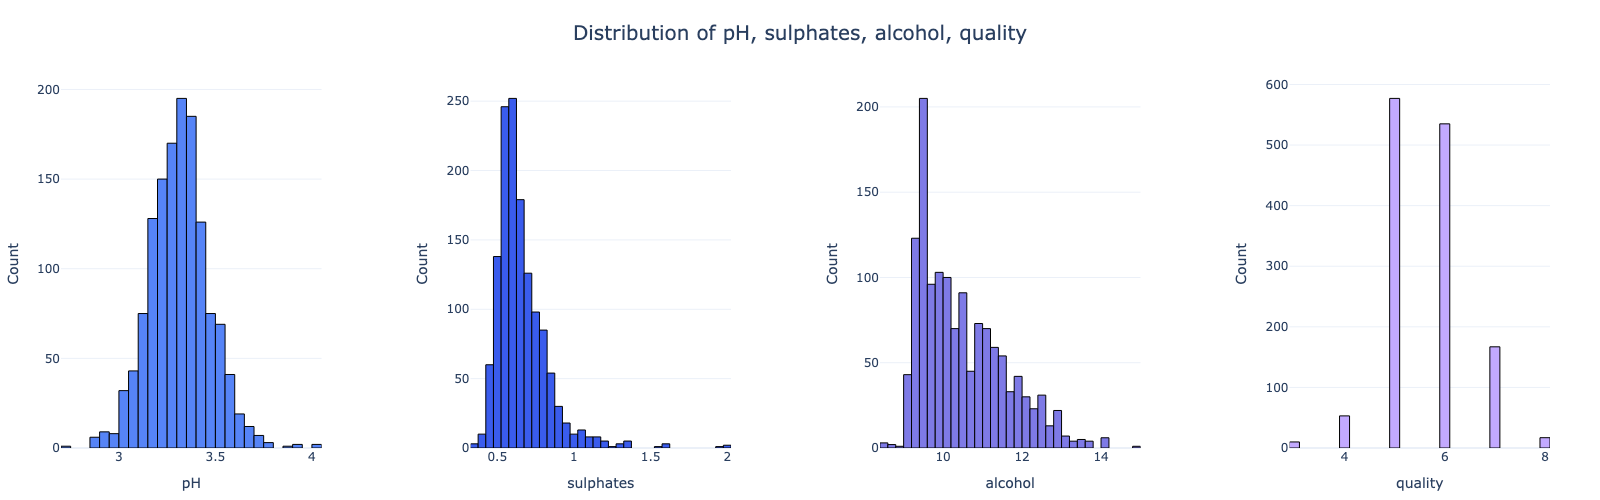

In [18]:
Image(filename="images/histograms2.png")

**pH:** The distribution is approximately normal, indicating that most wines have a pH level around 3.2, with fewer wines having significantly higher or lower pH levels.

**Sulphates:** The data is right-skewed, showing that most wines have a sulphate level around 0.5, with only a few wines having a level above 1.

**Alcohol:** This feature shows a right-skewed distribution, indicating that most wines have an alcohol level around 9-10%, with fewer wines having a level above 13%.

**Quality:** The distribution is approximately normal, suggesting that most wines have a quality rating around 6, with few wines having significantly higher or lower ratings.

Our initial data exploration using histograms revealed that most features (fixed acidity, volatile acidity, etc.) exhibit right-skewed distributions, indicating a concentration of wines with values clustered around a central point. 

This pattern suggests that the majority of wines fall within a specific range for these features. In contrast, "density" and "pH" show distributions closer to normal, while "citric acid" has a unique bimodal distribution. 

Notably, "quality" itself appears to be normally distributed.  

These observations provide a foundation for further analysis, particularly investigating relationships between these features and wine quality to identify potential patterns and correlations.

With that in mind as our dataset is mostly right skewed, we will perform log transformation.

In [19]:
columns_to_transform = [
    "sulphates",
    "alcohol",
    "chlorides",
    "free_sulfur_dioxide",
    "total_sulfur_dioxide",
    "fixed_acidity",
    "volatile_acidity",
    "citric_acid",
    "residual_sugar",
]
transformed_wine_df = log_transform_features(wine_df, columns_to_transform)

In [20]:
outlier_info = identify_outliers(transformed_wine_df)
print(outlier_info["outliers_per_column"])
print(
    f"Total number of outliers across all columns: {outlier_info['total_outliers']}"
)

fixed_acidity            12
volatile_acidity          8
citric_acid               0
residual_sugar          108
chlorides                87
free_sulfur_dioxide       0
total_sulfur_dioxide      0
density                  35
pH                       28
sulphates                48
alcohol                   7
quality                  27
dtype: int64
Total number of outliers across all columns: 360


We got rid of at least 142 outliers, for now we will keep the dataset as it is and will not check the distribution of the transformed 
features and move to correlation matrix.

In [21]:
corr_matrix = transformed_wine_df.corr()
print(corr_matrix)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.259980     0.656309   
volatile_acidity          -0.259980          1.000000    -0.575063   
citric_acid                0.656309         -0.575063     1.000000   
residual_sugar             0.159338          0.020262     0.163785   
chlorides                  0.112359          0.067558     0.194126   
free_sulfur_dioxide       -0.161301          0.005780    -0.061352   
total_sulfur_dioxide      -0.106640          0.077575     0.027812   
density                    0.677643          0.031674     0.352629   
pH                        -0.708034          0.245293    -0.551118   
sulphates                  0.198090         -0.278336     0.331680   
alcohol                   -0.091192         -0.209158     0.095063   
quality                    0.109715         -0.397329     0.227422   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [22]:
plot_heatmap(corr_matrix, save_path="images/correlation_heatmap.png")

ValueError: Invalid property specified for object of type plotly.graph_objs.heatmap.ColorBar: 'titleside'

Did you mean "title"?

    Valid properties:
        bgcolor
            Sets the color of padded area.
        bordercolor
            Sets the axis line color.
        borderwidth
            Sets the width (in px) or the border enclosing this
            color bar.
        dtick
            Sets the step in-between ticks on this axis. Use with
            `tick0`. Must be a positive number, or special strings
            available to "log" and "date" axes. If the axis `type`
            is "log", then ticks are set every 10^(n*dtick) where n
            is the tick number. For example, to set a tick mark at
            1, 10, 100, 1000, ... set dtick to 1. To set tick marks
            at 1, 100, 10000, ... set dtick to 2. To set tick marks
            at 1, 5, 25, 125, 625, 3125, ... set dtick to
            log_10(5), or 0.69897000433. "log" has several special
            values; "L<f>", where `f` is a positive number, gives
            ticks linearly spaced in value (but not position). For
            example `tick0` = 0.1, `dtick` = "L0.5" will put ticks
            at 0.1, 0.6, 1.1, 1.6 etc. To show powers of 10 plus
            small digits between, use "D1" (all digits) or "D2"
            (only 2 and 5). `tick0` is ignored for "D1" and "D2".
            If the axis `type` is "date", then you must convert the
            time to milliseconds. For example, to set the interval
            between ticks to one day, set `dtick` to 86400000.0.
            "date" also has special values "M<n>" gives ticks
            spaced by a number of months. `n` must be a positive
            integer. To set ticks on the 15th of every third month,
            set `tick0` to "2000-01-15" and `dtick` to "M3". To set
            ticks every 4 years, set `dtick` to "M48"
        exponentformat
            Determines a formatting rule for the tick exponents.
            For example, consider the number 1,000,000,000. If
            "none", it appears as 1,000,000,000. If "e", 1e+9. If
            "E", 1E+9. If "power", 1x10^9 (with 9 in a super
            script). If "SI", 1G. If "B", 1B.
        labelalias
            Replacement text for specific tick or hover labels. For
            example using {US: 'USA', CA: 'Canada'} changes US to
            USA and CA to Canada. The labels we would have shown
            must match the keys exactly, after adding any
            tickprefix or ticksuffix. For negative numbers the
            minus sign symbol used (U+2212) is wider than the
            regular ascii dash. That means you need to use −1
            instead of -1. labelalias can be used with any axis
            type, and both keys (if needed) and values (if desired)
            can include html-like tags or MathJax.
        len
            Sets the length of the color bar This measure excludes
            the padding of both ends. That is, the color bar length
            is this length minus the padding on both ends.
        lenmode
            Determines whether this color bar's length (i.e. the
            measure in the color variation direction) is set in
            units of plot "fraction" or in *pixels. Use `len` to
            set the value.
        minexponent
            Hide SI prefix for 10^n if |n| is below this number.
            This only has an effect when `tickformat` is "SI" or
            "B".
        nticks
            Specifies the maximum number of ticks for the
            particular axis. The actual number of ticks will be
            chosen automatically to be less than or equal to
            `nticks`. Has an effect only if `tickmode` is set to
            "auto".
        orientation
            Sets the orientation of the colorbar.
        outlinecolor
            Sets the axis line color.
        outlinewidth
            Sets the width (in px) of the axis line.
        separatethousands
            If "true", even 4-digit integers are separated
        showexponent
            If "all", all exponents are shown besides their
            significands. If "first", only the exponent of the
            first tick is shown. If "last", only the exponent of
            the last tick is shown. If "none", no exponents appear.
        showticklabels
            Determines whether or not the tick labels are drawn.
        showtickprefix
            If "all", all tick labels are displayed with a prefix.
            If "first", only the first tick is displayed with a
            prefix. If "last", only the last tick is displayed with
            a suffix. If "none", tick prefixes are hidden.
        showticksuffix
            Same as `showtickprefix` but for tick suffixes.
        thickness
            Sets the thickness of the color bar This measure
            excludes the size of the padding, ticks and labels.
        thicknessmode
            Determines whether this color bar's thickness (i.e. the
            measure in the constant color direction) is set in
            units of plot "fraction" or in "pixels". Use
            `thickness` to set the value.
        tick0
            Sets the placement of the first tick on this axis. Use
            with `dtick`. If the axis `type` is "log", then you
            must take the log of your starting tick (e.g. to set
            the starting tick to 100, set the `tick0` to 2) except
            when `dtick`=*L<f>* (see `dtick` for more info). If the
            axis `type` is "date", it should be a date string, like
            date data. If the axis `type` is "category", it should
            be a number, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        tickangle
            Sets the angle of the tick labels with respect to the
            horizontal. For example, a `tickangle` of -90 draws the
            tick labels vertically.
        tickcolor
            Sets the tick color.
        tickfont
            Sets the color bar's tick label font
        tickformat
            Sets the tick label formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        tickformatstops
            A tuple of :class:`plotly.graph_objects.heatmap.colorba
            r.Tickformatstop` instances or dicts with compatible
            properties
        tickformatstopdefaults
            When used in a template (as layout.template.data.heatma
            p.colorbar.tickformatstopdefaults), sets the default
            property values to use for elements of
            heatmap.colorbar.tickformatstops
        ticklabeloverflow
            Determines how we handle tick labels that would
            overflow either the graph div or the domain of the
            axis. The default value for inside tick labels is *hide
            past domain*. In other cases the default is *hide past
            div*.
        ticklabelposition
            Determines where tick labels are drawn relative to the
            ticks. Left and right options are used when
            `orientation` is "h", top and bottom when `orientation`
            is "v".
        ticklabelstep
            Sets the spacing between tick labels as compared to the
            spacing between ticks. A value of 1 (default) means
            each tick gets a label. A value of 2 means shows every
            2nd label. A larger value n means only every nth tick
            is labeled. `tick0` determines which labels are shown.
            Not implemented for axes with `type` "log" or
            "multicategory", or when `tickmode` is "array".
        ticklen
            Sets the tick length (in px).
        tickmode
            Sets the tick mode for this axis. If "auto", the number
            of ticks is set via `nticks`. If "linear", the
            placement of the ticks is determined by a starting
            position `tick0` and a tick step `dtick` ("linear" is
            the default value if `tick0` and `dtick` are provided).
            If "array", the placement of the ticks is set via
            `tickvals` and the tick text is `ticktext`. ("array" is
            the default value if `tickvals` is provided).
        tickprefix
            Sets a tick label prefix.
        ticks
            Determines whether ticks are drawn or not. If "", this
            axis' ticks are not drawn. If "outside" ("inside"),
            this axis' are drawn outside (inside) the axis lines.
        ticksuffix
            Sets a tick label suffix.
        ticktext
            Sets the text displayed at the ticks position via
            `tickvals`. Only has an effect if `tickmode` is set to
            "array". Used with `tickvals`.
        ticktextsrc
            Sets the source reference on Chart Studio Cloud for
            `ticktext`.
        tickvals
            Sets the values at which ticks on this axis appear.
            Only has an effect if `tickmode` is set to "array".
            Used with `ticktext`.
        tickvalssrc
            Sets the source reference on Chart Studio Cloud for
            `tickvals`.
        tickwidth
            Sets the tick width (in px).
        title
            :class:`plotly.graph_objects.heatmap.colorbar.Title`
            instance or dict with compatible properties
        x
            Sets the x position with respect to `xref` of the color
            bar (in plot fraction). When `xref` is "paper",
            defaults to 1.02 when `orientation` is "v" and 0.5 when
            `orientation` is "h". When `xref` is "container",
            defaults to 1 when `orientation` is "v" and 0.5 when
            `orientation` is "h". Must be between 0 and 1 if `xref`
            is "container" and between "-2" and 3 if `xref` is
            "paper".
        xanchor
            Sets this color bar's horizontal position anchor. This
            anchor binds the `x` position to the "left", "center"
            or "right" of the color bar. Defaults to "left" when
            `orientation` is "v" and "center" when `orientation` is
            "h".
        xpad
            Sets the amount of padding (in px) along the x
            direction.
        xref
            Sets the container `x` refers to. "container" spans the
            entire `width` of the plot. "paper" refers to the width
            of the plotting area only.
        y
            Sets the y position with respect to `yref` of the color
            bar (in plot fraction). When `yref` is "paper",
            defaults to 0.5 when `orientation` is "v" and 1.02 when
            `orientation` is "h". When `yref` is "container",
            defaults to 0.5 when `orientation` is "v" and 1 when
            `orientation` is "h". Must be between 0 and 1 if `yref`
            is "container" and between "-2" and 3 if `yref` is
            "paper".
        yanchor
            Sets this color bar's vertical position anchor This
            anchor binds the `y` position to the "top", "middle" or
            "bottom" of the color bar. Defaults to "middle" when
            `orientation` is "v" and "bottom" when `orientation` is
            "h".
        ypad
            Sets the amount of padding (in px) along the y
            direction.
        yref
            Sets the container `y` refers to. "container" spans the
            entire `height` of the plot. "paper" refers to the
            height of the plotting area only.
        
Did you mean "title"?

Bad property path:
titleside
^^^^^^^^^

In [ ]:
Image(filename="images/correlation_heatmap.png")

Our analysis of the correlation matrix reveals notable relationships within the red wine data:

### Positive Correlations:
- **Fixed Acidity and Citric Acid**: This suggests a trend where wines with higher fixed acidity tend to also possess higher citric acid content, potentially contributing to the overall flavor profile.
- **Quality and Alcohol**: Exhibits the strongest positive correlation in the dataset, indicating that wines with higher alcohol content are generally perceived as being of higher quality.

### Negative Correlations:
- **Volatile Acidity and Quality**: There is a trend where higher levels of volatile acidity are associated with lower wine quality, likely due to the influence on taste and aroma.
- **pH and Citric Acid**: Demonstrates that wines with higher acidity typically have lower pH values, reflecting the direct chemical relationship between these factors.

Given these correlations, we should check our distributions once again before moving forward.

In [ ]:
plot_histograms(
    transformed_wine_df,
    ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar"],
    save_path="images/histograms_transformed.png",
)

In [ ]:
Image(filename="images/histograms_transformed.png")

In [ ]:
plot_histograms(
    transformed_wine_df,
    ["chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density"],
    save_path="images/histograms1_transformed.png",
)

In [ ]:
Image(filename="images/histograms1_transformed.png")

In [ ]:
plot_histograms(
    transformed_wine_df,
    ["pH", "sulphates", "alcohol", "quality"],
    save_path="images/histograms2_transformed.png",
)

In [ ]:
Image(filename="images/histograms2_transformed.png")

Since most features appear to be approximately normally distributed, we can proceed with statistical hypothesis testing to further explore these relationships. The entire dataset of red wines will serve as our target population for these tests. Given the normality assumption, we will use Pearson's correlation coefficient (r) test instead of Z or t-tests for our numerical features.

### Hypotheses for Statistical Testing:

1. **Fixed Acidity and Citric Acid**
   - **Null Hypothesis (H0)**: There is no significant relationship between fixed acidity and citric acid levels in wines.
   - **Alternative Hypothesis (H1)**: Wines with higher fixed acidity have higher citric acid levels.

2. **Quality and Alcohol**
   - **Null Hypothesis (H0)**: Alcohol content does not significantly affect wine quality.
   - **Alternative Hypothesis (H1)**: Higher alcohol content is associated with higher wine quality.

3. **Volatile Acidity and Quality**
   - **Null Hypothesis (H0)**: Volatile acidity levels do not significantly affect wine quality.
   - **Alternative Hypothesis (H1)**: Higher volatile acidity is associated with lower wine quality.

4. **pH and Citric Acid**
   - **Null Hypothesis (H0)**: Citric acid levels do not significantly affect the pH of wines.
   - **Alternative Hypothesis (H1)**: Higher citric acid levels result in lower pH values in wines.

These hypotheses will guide our detailed statistical analysis to further validate the initial findings from our correlation study.

In [ ]:
test_correlation(transformed_wine_df, "fixed_acidity", "citric_acid")

In [ ]:
plot_correlation(
    transformed_wine_df,
    "fixed_acidity",
    "citric_acid",
    save_path="images/correlation_plot.png",
)

In [ ]:
Image(filename="images/correlation_plot.png")

**There's a clear connection between two important wine properties: fixed acidity and citric acid.** Our analysis shows a positive correlation of 0.656. This means when fixed acidity levels go up, citric acid levels tend to go up as well. 

The results are incredibly statistically significant, with a p-value close to zero. This strong evidence allows us to reject the idea of no relationship between these properties (null hypothesis). 

The 95% confidence interval (0.618 to 0.694) excludes zero, which boosts our confidence in the positive correlation. This interval tells us how precise our estimate of the connection is.

The equation of the regression line (y = 0.562x - 1.014) helps visualize this trend. Here, "x" represents fixed acidity and "y" represents citric acid content. If fixed acidity (x) increases by one unit, we can expect the citric acid (y) to increase by about 0.562, assuming all other factors remain constant.

**In simpler terms, wines with higher fixed acidity tend to have more citric acid, and vice versa. This link is statistically significant, meaning it's very unlikely to be random.**

In [ ]:
test_correlation(transformed_wine_df, "quality", "alcohol")

In [ ]:
plot_correlation(
    transformed_wine_df,
    "quality",
    "alcohol",
    save_path="images/correlation_plot1.png",
)

In [ ]:
Image(filename="images/correlation_plot1.png")

**Our analysis suggests that higher alcohol content might be associated with better quality wines.** There's a moderate positive correlation (0.481), meaning wines with more alcohol tend to get higher quality ratings. 

This connection is statistically significant, with a very small p-value (basically zero). This means it's very unlikely to be due to random chance. We can therefore reject the initial idea (null hypothesis) that alcohol content has no effect on quality.

The 95% confidence interval (0.437 to 0.526) excludes zero, which strengthens our confidence in the positive correlation. This interval tells us how precise our estimate of the connection is.

To visualize this, the scatter plot shows an upward trend. The equation (y=0.054x+2.131) represents this trend, where "x" is alcohol content and "y" is perceived quality. As the alcohol content increases (x), the perceived quality (y) also goes up, further supporting the positive association.

**In simpler terms, there's a good chance that wines with higher alcohol content are rated as being of higher quality.** 


In [ ]:
test_correlation(transformed_wine_df, "volatile_acidity", "quality")

In [ ]:
plot_correlation(
    transformed_wine_df,
    "volatile_acidity",
    "quality",
    save_path="images/correlation_plot2.png",
)

In [ ]:
Image(filename="images/correlation_plot2.png")

**Looks like higher volatile acidity might not be good news for wine quality.** Our analysis shows a negative correlation of -0.397. This means wines with higher levels of volatile acidity tend to get lower quality ratings. 

More importantly, the results are statistically significant, with a very small p-value (basically zero). This strengthens the idea that the connection isn't random. 

The 95% confidence interval (-0.444 to -0.351) excludes zero, making us more confident in the negative correlation. This interval tells us how precise our estimate of the connection is.

The equation of the regression line (y = -2.799x + 6.793) helps visualize this. Here, "x" represents volatile acidity and "y" represents quality score. If the volatile acidity (x) increases by one unit, the quality score (y) is expected to decrease by about 2.799 points, assuming everything else stays the same.

**In simpler terms, wines with higher volatile acidity tend to be rated lower in quality.**

In [ ]:
test_correlation(transformed_wine_df, "pH", "citric_acid")

In [ ]:
plot_correlation(
    transformed_wine_df,
    "pH",
    "citric_acid",
    save_path="images/correlation_plot3.png",
)

In [ ]:
Image(filename="images/correlation_plot3.png")


**Our analysis found a link between wine's pH and citric acid content.** There's a moderate negative correlation of -0.551, meaning wines with higher levels of citric acid tend to have lower pH values. This makes sense because citric acid contributes to a wine's acidity.

The results are very statistically significant (p-value basically zero), which means it's highly unlikely to be random. We can confidently reject the idea of no connection (null hypothesis).

The 95% confidence interval (-0.593 to -0.509) excludes zero, further strengthening our belief in the negative correlation. This interval tells us how precise our estimate of the connection is.

The equation of the regression line (y = -0.543x + 2.028) helps visualize this. Here, "x" represents pH and "y" represents citric acid content. If the pH (x) goes up by one unit, citric acid (y) is expected to decrease by about 0.543, assuming everything else stays the same. With a neutral pH (x = 7), the expected citric acid content is around 2.028.

**In simpler terms, wines with higher citric acid tend to have lower pH, and vice versa.** This connection is statistically significant, meaning it's likely not a coincidence.

In [ ]:
model_results, X_test, y_test, y_pred = train_linear_model(
    transformed_wine_df, "quality"
)
plot_model_predictions(
    X_test,
    y_test,
    y_pred,
    "Predicted Quality vs Actual Quality",
    save_path="images/model_predictions.png",
)

In [ ]:
Image(filename="images/model_predictions.png")

This model uses various physicochemical characteristics of wine to predict its quality. Below are some key points from the model's summary:

- **R-squared (Explained Variance):** The model explains approximately 35.4% of the variance in wine quality. This indicates how much of the total variation in wine quality our model can account for based on the variables used.
- **Important Predictors:** Characteristics such as volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulphates, and alcohol are significant predictors of wine quality.
- **Model Diagnostics:**
  - **Durbin-Watson:** Close to 2, suggesting there are no major concerns regarding the independence of residuals.
  - **Jarque-Bera Test:** Indicates that residuals are not normally distributed, which is an area for caution.
  - **Condition Number:** High, suggesting potential issues with multicollinearity among predictors.

The plot, compares the predicted wine quality against the actual wine quality. It helps us visualize the accuracy of our predictions across different levels of wine quality. Some findings, predictions become more scattered as actual quality increases, indicating that the model is less accurate for higher-quality wines.

- **F-statistic and Prob (F-statistic):** These metrics confirm that the overall regression model is statistically significant, meaning the predictors do have an impact on wine quality.
- **AIC/BIC:** Lower values are preferred as they indicate a better model fit. These criteria help compare our model with others by balancing goodness of fit and complexity.
- **Condition Number:** Indicates potential overlap in what our predictors tell us, which might affect the reliability of our predictions.

- **Categorization of Quality:** Considering transforming the wine quality from a continuous variable to categorical (e.g., Low, Medium, High). This might enhance model performance and interpretability, especially at higher quality levels where predictions are currently less accurate.

While our model provides a foundation for predicting wine quality, refining it or approaching the prediction task differently could yield better results and more actionable insights.

In [ ]:
model_results, X_test, y_test, y_pred = train_linear_model(
    transformed_wine_df, "alcohol"
)
plot_model_predictions(
    X_test,
    y_test,
    y_pred,
    "Predicted Alcohol vs Actual Alcohol",
    save_path="images/model_predictions1.png",
)

In [ ]:
Image(filename="images/model_predictions1.png")

This model evaluates how various characteristics of wine can predict its alcohol content. Here are the highlights and key points from the model's summary:

- **R-squared (Explained Variance):** The model explains approximately 71.9% of the variance in alcohol content. This indicates a strong relationship between the predictors used and the alcohol content in the wine.
- **Important Predictors:** Factors such as fixed acidity, volatile acidity, citric acid, sulphates, and wine quality are significant predictors of the alcohol content. Each of these characteristics has a statistically significant impact on the alcohol content.
- **Model Diagnostics:**
  - **Durbin-Watson:** With a value close to 2, this suggests that there is no significant autocorrelation in the residuals of the model.
  - **Jarque-Bera Test:** This indicates that the residuals are not normally distributed, which could suggest some concerns regarding the underlying assumptions of the model.
  - **Condition Number:** The high value points to potential multicollinearity issues among the predictors, which may affect the accuracy of the estimated coefficients.

The plot compares the predicted alcohol content against the actual alcohol content, showing how well the model performs in predicting wine alcohol levels.
Also, the plot shows that residuals are generally close to zero, especially around higher predicted values, indicating good model accuracy in these regions. However, some spread in residuals at lower predicted values suggests variability in accuracy.

- **F-statistic and Prob (F-statistic):** These indicate that the model as a whole is statistically significant—meaning the included predictors do impact the alcohol content.
- **AIC/BIC:** The lower these values, the better the model balance between fit and complexity, indicating a preferable model fit to the data.
- **Condition Number:** A reminder that the high number could mean some predictors are providing overlapping information, potentially complicating the interpretation of individual effects.

- **Addressing Non-Normality and Multicollinearity:** Adjustments such as transforming variables or revising the model to include or exclude certain variables might help in resolving the issues indicated by the Jarque-Bera test and high condition number.
- **Further Analysis:** Investigating other modeling approaches or adding interaction terms could provide deeper insights and potentially enhance the model’s performance and interpretability.

The model effectively predicts the alcohol content in wine with significant accuracy, although some areas for improvement remain, particularly in handling the underlying model assumptions and extending the model's applicability to broader wine types

## Key Findings from Red Wine Quality Analysis

### 1. Key Physicochemical Properties
- **Included Properties**: Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol content, and overall quality score.
- These properties represent critical measurements from various stages of wine production.

### 2. Distribution of Properties
- **Distribution Patterns**: Properties exhibit distributions that are right-skewed, normally distributed, or bimodal.
- Understanding these distributions helps in profiling typical physicochemical characteristics of the wines.

### 3. Outliers
- **Identification and Impact**: Outliers were identified using the Interquartile Range (IQR) method. Initially, these outliers were retained to allow potential uncovering of valuable insights.
- The significance and impact of these outliers on further analysis were discussed, with a plan to revisit their inclusion.

### 4. Influence on Wine Quality
- **Significant Properties**: Alcohol and volatile acidity show strong correlations with wine quality. Higher alcohol content correlates positively with higher quality, whereas higher volatile acidity correlates negatively with quality.
- These findings are derived from correlation analyses and regression modeling.

### 5. Predictive Modeling of Wine Quality
- **Model Insights**: Linear regression was used, with an R-squared value indicating moderate explanatory power of 35.4%.
- The models highlighted the importance of alcohol, sulphates, and acidity levels as predictors of quality.

### 6. Predictors of Alcohol Content
- **Model Findings**: A separate model was developed for predicting alcohol content, emphasizing the significance of fixed acidity, volatile acidity, citric acid, sulphates, and wine quality.
- This model also showed strong explanatory power of 71.9% and provided insights into the physicochemical properties influencing alcohol levels.

### 7. Issues Affecting Model Reliability
- **Challenges Identified**: Multicollinearity and non-normal distribution of residuals were notable issues, potentially affecting the accuracy and reliability of predictions.

### 8. Suggestions for Model Improvement
- **Enhancement Strategies**:
  - Consideration of non-linear models to better capture relationships.
  - Variable transformations to address non-normality and multicollinearity.
  - Categorizing wine quality for improved model interpretability and accuracy.

### Conclusion
- This analysis provides a comprehensive understanding of the factors influencing red wine quality and alcohol content. The insights can aid producers and marketers in improving wine production and positioning strategies based on scientific findings.